# colab

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
%cd /content/drive/MyDrive/github/ids

/content/drive/MyDrive/github/ids


# git

In [104]:
!git pull --prune

remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 1), reused 3 (delta 1), pack-reused 0
Unpacking objects: 100% (3/3), 902 bytes | 13.00 KiB/s, done.
From https://github.com/pro1710/ids
   f7e9685..4247731  main       -> origin/main
Updating f7e9685..4247731
Fast-forward
 requirements.txt | 66 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 1 file changed, 66 insertions(+)
 create mode 100644 requirements.txt


In [105]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   colab.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [219]:
!git add colab.ipynb

In [ ]:
from google.colab import userdata
print(f'''!git config --global user.email "{userdata.get('user.email')}"''')
print(f'''!git config --global user.name "{userdata.get('user.name')}"''')

In [220]:
!git commit -m "colab.ipynb"

[main f17d212] colab.ipynb
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite colab.ipynb (93%)


In [221]:
!git push

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 38.97 KiB | 1.30 MiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/pro1710/ids.git
   4247731..f17d212  main -> main


# code

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
%matplotlib inline

In [107]:
import importlib
import ids_common
importlib.reload(ids_common)

<module 'ids_common' from '/content/drive/MyDrive/github/ids/ids_common.py'>

In [108]:
path_to_dataset = './dataset/ML-EdgeIIoT-dataset.csv'


In [252]:
df = pd.read_csv(path_to_dataset, low_memory=False)

df.groupby('Attack_label')['dns.qry.name.len'].value_counts()


Attack_label  dns.qry.name.len      
0             0                          24272
              1.debian.pool.ntp.org         10
              0.debian.pool.ntp.org          8
              3.debian.pool.ntp.org          7
              2.debian.pool.ntp.org          3
              _googlecast._tcp.local         1
1             0.0                       133272
              1.0                          227
Name: dns.qry.name.len, dtype: int64

In [253]:

# -----------------------------------------------------------------------------------------------------

DROP = 'DROP'
TARGET = 'TARGET'
UNKNOWN = 'UNKNOWN'
SINGLE_VAL = 'SINGLE_VAL'
FIX_0 = 'FIX_0'
TO_CAT = 'TO_CAT'
TO_NUM = 'TO_NUM'
TO_BOOL = 'TO_BOOL'

feature_actions = {
        'frame.time' : [DROP],
        'ip.src_host' : [DROP],
        'ip.dst_host' : [DROP],
        'arp.dst.proto_ipv4' : [DROP],
        'arp.opcode' : [TO_NUM],
        'arp.hw.size' : [TO_NUM],
        'arp.src.proto_ipv4' : [DROP],
        'icmp.checksum' : [TO_NUM],
        'icmp.seq_le' : [TO_NUM],
        'icmp.transmit_timestamp' : [DROP],
        'icmp.unused' : [SINGLE_VAL],
        'http.file_data' : [DROP], #
        'http.content_length' : [TO_NUM],
        'http.request.uri.query' : [DROP],
        'http.request.method': [FIX_0, TO_CAT],
        'http.referer': [FIX_0, TO_CAT],
        'http.request.full_uri': [DROP],
        'http.request.version': [FIX_0, TO_CAT],
        'http.response': [TO_BOOL, TO_CAT],
        'http.tls_port': [SINGLE_VAL],
        'tcp.ack': [TO_NUM],
        'tcp.ack_raw': [TO_NUM],
        'tcp.checksum': [TO_NUM],
        'tcp.connection.fin': [TO_CAT],
        'tcp.connection.rst': [TO_CAT],
        'tcp.connection.syn': [TO_CAT],
        'tcp.connection.synack': [TO_CAT],
        'tcp.dstport': [DROP], #
        'tcp.flags': [TO_NUM],
        'tcp.flags.ack': [TO_BOOL, TO_CAT],
        'tcp.len': [TO_NUM],
        'tcp.options': [DROP], #
        'tcp.payload': [DROP], #
        'tcp.seq': [TO_NUM],
        'tcp.srcport': [DROP],
        'udp.port': [DROP],
        'udp.stream': [TO_NUM],
        'udp.time_delta': [UNKNOWN],
        'dns.qry.name': [UNKNOWN],
        'dns.qry.name.len': [FIX_0, TO_BOOL, TO_NUM], #[FIX_0, TO_CAT],
        'dns.qry.qu': [TO_BOOL, TO_CAT],
        'dns.qry.type': [SINGLE_VAL],
        'dns.retransmission': [TO_BOOL, TO_CAT],
        'dns.retransmit_request': [TO_CAT],
        'dns.retransmit_request_in': [SINGLE_VAL],
        'mqtt.conack.flags': [SINGLE_VAL],
        'mqtt.conflag.cleansess': [TO_BOOL, TO_CAT],
        'mqtt.conflags': [TO_NUM],
        'mqtt.hdrflags': [TO_NUM],
        'mqtt.len': [TO_NUM],
        'mqtt.msg_decoded_as': [SINGLE_VAL],
        'mqtt.msg': [DROP], #
        'mqtt.msgtype': [TO_NUM],
        'mqtt.proto_len': [TO_NUM],
        'mqtt.protoname': [FIX_0, TO_CAT],
        'mqtt.topic': [FIX_0, TO_CAT],
        'mqtt.topic_len': [TO_NUM],
        'mqtt.ver': [TO_NUM],
        'mbtcp.len': [SINGLE_VAL],
        'mbtcp.trans_id': [SINGLE_VAL],
        'mbtcp.unit_id': [SINGLE_VAL],
        'Attack_label': [TARGET],
        'Attack_type': [TARGET]
    }

def transform(df, feature_actions):
    drop_columns = []
    encode_columns = []
    for feature, actions in feature_actions.items():
        if DROP in actions or SINGLE_VAL in actions:
            drop_columns.append(feature)
            continue

        if FIX_0 in actions:
            df.loc[(df[feature] == '0') | (df[feature] == '0x00000000'), feature] = '0.0'
        if TO_BOOL in actions:
            df[feature] = df[feature].apply(lambda x: '0.0' if str(x) in ['0.0', '0'] else '1.0')

        if TO_CAT in actions:
            encode_columns.append(feature)
            if df[feature].dtype != object:
                df[feature] = df[feature].astype('object')

        if TO_NUM in actions and df[feature].dtype != np.float64:
            df[feature] = df[feature].astype('float64')

        if TARGET in actions:
             df[feature] = df[feature].astype('category')


    for feature in encode_columns:
        ids_common.encode_text_dummy(df, feature)

    df.drop(drop_columns, axis=1, inplace=True)

    df.dropna(axis=0, how='any', inplace=True)
    df.drop_duplicates(subset=None, keep='first', inplace=True)

    return df


def prepare_dataset_v01(path_to_dataset):

    df = pd.read_csv(path_to_dataset, low_memory=False)
    df = transform(df, feature_actions)
    return df


# -------------------------------------------------------------------------------------------------------


df = None
df = prepare_dataset_v01(path_to_dataset)


# stats = []

# for col in df.columns:
#     uniques = df[col].unique()
#     num_uniques = len(uniques)
#     stats.append((col, df[col].dtype, num_uniques))

# print(f'SHAPE: {df.shape}')

# num_rows = df.shape[0]

# for i, sts in enumerate(sorted(stats, key=lambda x: x[2])):
#     c, t, u = sts
#     ft = feature_actions[c]

#     if TO_BOOL in ft:

#         print(f'{i:<4}{c:<32}{str(t):<12}{u:>6} [{str(ft):^24}]')
#         if u < 10 :
#             # val_count = df[c].value_counts().sort_values()
#             val_count = df.groupby('Attack_label')[c].value_counts()
#             print(val_count)
#         print('-'*80)



/content/drive/MyDrive/github/ids/ids_common.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[name])
/content/drive/MyDrive/github/ids/ids_common.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[name])
/content/drive/MyDrive/github/ids/ids_common.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[name])
/content/drive/MyDrive/github/ids/ids_common.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[name])
/content/drive/MyDrive/github/ids/ids_common.py:

----------------------------------------------

## ML

In [110]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

SEED = random.randint(0, 42424242)
SEED = 42
print(f'SEED = {SEED}')

target_label_2_class = 'Attack_label' # 0 indicates normal and 1 indicates attacks
target_label_15_class = 'Attack_type'

def dataset_split(dataset, target):
    y = dataset[target]
    X = dataset.drop([target_label_2_class, target_label_15_class], axis=1, inplace=False)
    return train_test_split(X, y, test_size=0.3, random_state=SEED, stratify=y)

def show_cr(y_test, y_test_predict):

    cr = classification_report(y_test, y_test_predict, output_dict=True)

    paper_cols = ['Normal',
                'Back',
                'HTTP',
                'ICMP',
                'TCP',
                'UDP',
                'Fing',
                'MITM',
                'Pwd',
                'Port',
                'Rans',
                'SQL',
                'Upload',
                'Scan',
                'XSS']

    map_to_paper = {'Normal':'Normal',
                    'Back':'Backdoor',
                    'HTTP':'DDoS_HTTP',
                    'ICMP':'DDoS_ICMP',
                    'TCP':'DDoS_TCP',
                    'UDP':'DDoS_UDP',
                    'Fing':'Fingerprinting',
                    'MITM':'MITM',
                    'Pwd':'Password',
                    'Port':'Port_Scanning',
                    'Rans':'Ransomware',
                    'SQL':'SQL_injection',
                    'Upload':'Uploading',
                    'Scan':'Vulnerability_scanner',
                    'XSS':'XSS'
                    }

    header='{:^10}|'*16
    cols_pattern='{:^10}|' + '{:^10.2f}|'*15

    metrics = ['precision', 'recall', 'f1-score']

    print(header.format('Metr', *paper_cols))
    print(header.format(*['-'*10]*16))

    # print(cr)
    for m in metrics:
        vals = []
        for col in paper_cols:
            vals.append(cr[map_to_paper[col]][m])

        print(cols_pattern.format(m, *vals), f'{cr["accuracy"]:0.2f}')

    print(header.format(*['-'*10]*16))

def report_2(y_train, y_train_predict, y_test, y_test_predict):

    print('TRAIN:')
    print(classification_report(y_train, y_train_predict))

    print('TEST:')
    print(classification_report(y_test, y_test_predict))

def report_15(y_train, y_train_predict, y_test, y_test_predict):

    print('TRAIN:')
    print(show_cr(y_train, y_train_predict))

    print('TEST:')
    print(show_cr(y_test, y_test_predict))

def show_ds_stats(df):
    stats = []

    for col in df.columns:
        uniques = df[col].unique()
        num_uniques = len(uniques)
        stats.append((col, df[col].dtype, num_uniques))

    print(f'SHAPE: {df.shape}')

    num_rows = df.shape[0]

    for i, sts in enumerate(sorted(stats, key=lambda x: x[2])):
        c, t, u = sts
        dropped = '------------'
        print(f'{i:<4}{c:<32}{str(t):<12}{u:>6} [{dropped:^24}]')

        if u < 10:
            # val_count = df[c].value_counts().sort_values()
            val_count = df.groupby('Attack_label')[c].value_counts()
            print(val_count)
        print('-'*80)

def plot_cm(y_true, y_predict):
    title='Normalized confusion matrix'

    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_predict,
        # display_labels=Attack_type_classes,
        cmap=plt.cm.Blues,
        normalize='true',
    )
    disp.ax_.set_title(title)
    disp.figure_.set_size_inches(4, 4, forward=True)
    plt.xticks(rotation=90)
    plt.show()

SEED = 42


# DT 2-class

/content/drive/MyDrive/github/ids/ids_common.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[name])
/content/drive/MyDrive/github/ids/ids_common.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[name])
/content/drive/MyDrive/github/ids/ids_common.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[name])
/content/drive/MyDrive/github/ids/ids_common.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[name])
/content/drive/MyDrive/github/ids/ids_common.py:

TRAIN:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     16871
           1       0.97      1.00      0.99     89661

    accuracy                           0.98    106532
   macro avg       0.99      0.92      0.95    106532
weighted avg       0.98      0.98      0.97    106532

TEST:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      7230
           1       0.97      1.00      0.99     38427

    accuracy                           0.98     45657
   macro avg       0.99      0.92      0.95     45657
weighted avg       0.98      0.98      0.98     45657



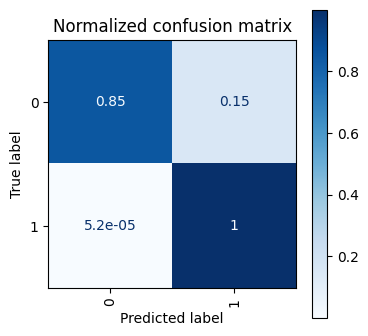

In [258]:
df  = prepare_dataset_v01(path_to_dataset)

X_train, X_test, y_train, y_test = dataset_split(df, target_label_2_class)

if False:
    tree_param = {'criterion':['gini','entropy', 'log_loss'],
                'max_depth':[4,8,16,32,64,96,124,148]}

    cls = DecisionTreeClassifier(random_state=SEED)
    grid_search = GridSearchCV(cls, tree_param)

    grid_search.fit(X_train, y_train)

    print('Tuned:')
    print('Parms: ', grid_search.best_params_)
    print('Score:', grid_search.best_score_)

    cls = grid_search.best_estimator_
else:
    best_params = {'criterion': 'entropy', 'max_depth': 8}
    cls = DecisionTreeClassifier(**best_params, random_state=SEED)

cls.fit(X_train, y_train)
y_train_predict = cls.predict(X_train)
y_test_predict = cls.predict(X_test)

report_2(y_train, y_train_predict, y_test, y_test_predict)

plot_cm(y_test, y_test_predict)

# RandomForest 2-class

/content/drive/MyDrive/github/ids/ids_common.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[name])
/content/drive/MyDrive/github/ids/ids_common.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[name])
/content/drive/MyDrive/github/ids/ids_common.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[name])
/content/drive/MyDrive/github/ids/ids_common.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[name])
/content/drive/MyDrive/github/ids/ids_common.py:

TRAIN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16871
           1       1.00      1.00      1.00     89661

    accuracy                           1.00    106532
   macro avg       1.00      1.00      1.00    106532
weighted avg       1.00      1.00      1.00    106532

TEST:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      7230
           1       0.98      0.99      0.98     38427

    accuracy                           0.97     45657
   macro avg       0.95      0.93      0.94     45657
weighted avg       0.97      0.97      0.97     45657



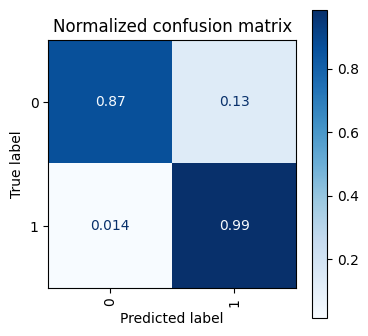

In [260]:
from sklearn.ensemble import RandomForestClassifier

df  = prepare_dataset_v01(path_to_dataset)

X_train, X_test, y_train, y_test = dataset_split(df, target_label_2_class)

if False:
    gs_param = {
        'n_estimators': [100, 200],
        'criterion':['entropy'],
        'max_depth':[128, 256],
        'max_features': ['log2']
        }

    cls = RandomForestClassifier(random_state=SEED)
    grid_search = GridSearchCV(cls, gs_param, verbose=3)

    grid_search.fit(X_train, y_train)

    print('Tuned:')
    print('Parms: ', grid_search.best_params_)
    print('Score:', grid_search.best_score_)

    cls = grid_search.best_estimator_
else:
    best_params = {'criterion': 'entropy', 'max_depth': 128, 'max_features': 'log2', 'n_estimators': 100}
    # Score: 0.9661056931585819
    #     TEST:
    #               precision    recall  f1-score   support

    #            0       0.91      0.87      0.89      7230
    #            1       0.98      0.98      0.98     38429

    #     accuracy                           0.97     45659
    #    macro avg       0.94      0.93      0.93     45659
    # weighted avg       0.97      0.97      0.97     45659

    cls = RandomForestClassifier(**best_params, random_state=SEED)

cls.fit(X_train, y_train)
y_train_predict = cls.predict(X_train)
y_test_predict = cls.predict(X_test)

report_2(y_train, y_train_predict, y_test, y_test_predict)

plot_cm(y_test, y_test_predict)

# SGDClassifier 2-class

/content/drive/MyDrive/github/ids/ids_common.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[name])
/content/drive/MyDrive/github/ids/ids_common.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[name])
/content/drive/MyDrive/github/ids/ids_common.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[name])
/content/drive/MyDrive/github/ids/ids_common.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[name])
/content/drive/MyDrive/github/ids/ids_common.py:

TRAIN:
              precision    recall  f1-score   support

           0       0.88      0.42      0.57     16871
           1       0.90      0.99      0.94     89661

    accuracy                           0.90    106532
   macro avg       0.89      0.70      0.76    106532
weighted avg       0.90      0.90      0.88    106532

TEST:
              precision    recall  f1-score   support

           0       0.88      0.42      0.57      7230
           1       0.90      0.99      0.94     38427

    accuracy                           0.90     45657
   macro avg       0.89      0.70      0.75     45657
weighted avg       0.90      0.90      0.88     45657



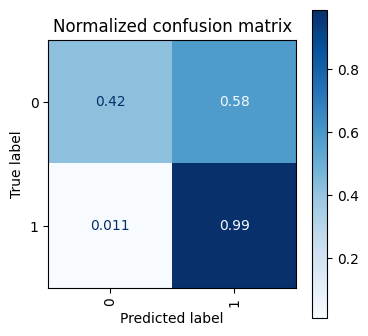

In [261]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

df  = prepare_dataset_v01(path_to_dataset)

X_train, X_test, y_train, y_test = dataset_split(df, target_label_2_class)

# if False:
    # tree_param = {'criterion':['gini','entropy', 'log_loss'],
    #             'max_depth':[4,5,6,7,8,16,32,48,64,80,96,124,148]}

    # dt_cls = SGDClassifier(random_state=SEED)
    # grid_search = GridSearchCV(dt_cls, tree_param)

    # grid_search.fit(X_train, y_train)

    # print('Tuned:')
    # print('Parms: ', grid_search.best_params_)
    # print('Score:', grid_search.best_score_)

    # dt_cls = grid_search.best_estimator_
# else:
    # best_params = {'criterion': 'entropy', 'max_depth': 8}
cls = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))

cls.fit(X_train, y_train)
y_train_predict = cls.predict(X_train)
y_test_predict = cls.predict(X_test)

report_2(y_train, y_train_predict, y_test, y_test_predict)

plot_cm(y_test, y_test_predict)

drop: NA: 0, DUPS: 5604
drop: NA: 0, DUPS: 5604
dropna: NA: 0, DUPS: 5604
drop_duplicates: NA: 0, DUPS: 0
################################################################################
TARGET: "Attack_label"
1    128095
0     24101
Name: Attack_label, dtype: int64
--------------------------------------------------------------------------------
TARGET: "Attack_type"
Normal                   24101
DDoS_UDP                 14498
DDoS_ICMP                13096
DDoS_HTTP                10495
SQL_injection            10282
DDoS_TCP                 10247
Uploading                10214
Vulnerability_scanner    10062
Password                  9972
Backdoor                  9865
Ransomware                9689
XSS                       9543
Port_Scanning             8921
Fingerprinting             853
MITM                       358
Name: Attack_type, dtype: int64
################################################################################
TRAIN:
                       precision    recall  f

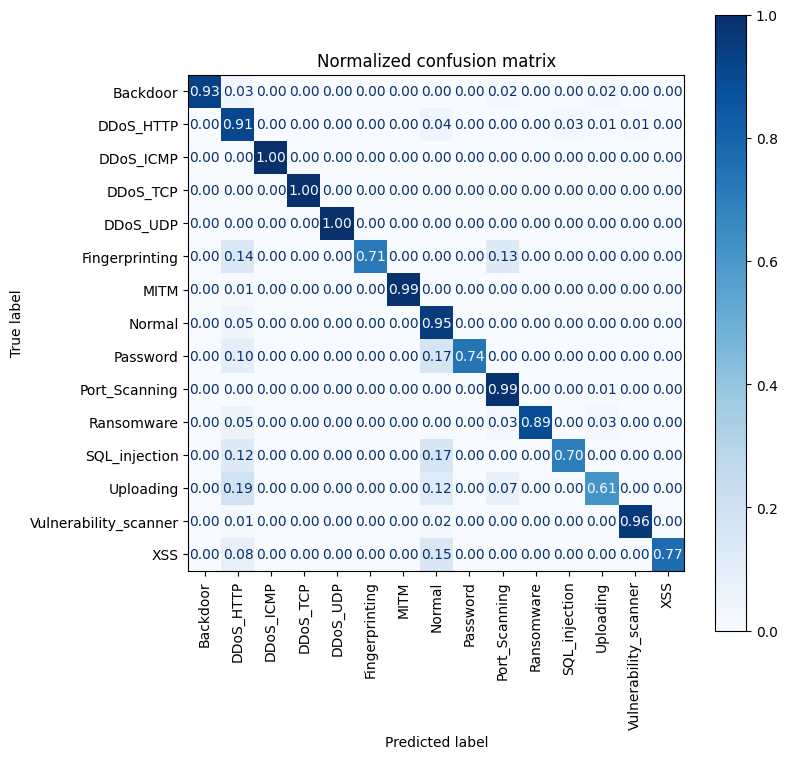

In [ ]:
# 15 class

df  = ids_common.prepare_dataset(path_to_dataset)

X_train, X_test, y_train, y_test = dataset_split(df, target_label_15_class)

if False:
    tree_param = {'criterion':['gini','entropy', 'log_loss'],
                'max_depth':[4,5,6,7,8,16,32,48,64,80,96,124,148]}

    dt_cls = DecisionTreeClassifier(random_state=SEED)
    grid_search = GridSearchCV(dt_cls, tree_param, verbose=3)

    grid_search.fit(X_train, y_train)

    print('Tuned:')
    print('Parms: ', grid_search.best_params_)
    print('Score:', grid_search.best_score_)

    dt_cls = grid_search.best_estimator_
else:
    best_params = {'criterion': 'entropy', 'max_depth': 16}
    dt_cls = DecisionTreeClassifier(**best_params, random_state=SEED)

dt_cls.fit(X_train, y_train)
y_train_predict = dt_cls.predict(X_train)
y_test_predict = dt_cls.predict(X_test)

report(y_train, y_train_predict, y_test, y_test_predict)

title='Normalized confusion matrix'

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_test_predict,
    # display_labels=Attack_type_classes,
    cmap=plt.cm.Blues,
    normalize='true',
    values_format='.2f'
)
disp.ax_.set_title(title)
disp.figure_.set_size_inches(8, 8, forward=True)

plt.xticks(rotation=90)
plt.show()

   Metr   |  Normal  |   Back   |   HTTP   |   ICMP   |   TCP    |   UDP    |   Fing   |   MITM   |   Pwd    |   Port   |   Rans   |   SQL    |  Upload  |   Scan   |   XSS    |
----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|
precision |   0.77   |   0.99   |   0.57   |   1.00   |   1.00   |   1.00   |   0.95   |   1.00   |   0.99   |   0.87   |   0.99   |   0.95   |   0.90   |   0.98   |   0.99   | 0.89
  recall  |   0.95   |   0.93   |   0.91   |   1.00   |   1.00   |   1.00   |   0.71   |   0.99   |   0.74   |   0.99   |   0.89   |   0.70   |   0.61   |   0.96   |   0.77   | 0.89
 f1-score |   0.85   |   0.96   |   0.70   |   1.00   |   1.00   |   1.00   |   0.81   |   1.00   |   0.84   |   0.93   |   0.93   |   0.81   |   0.73   |   0.97   |   0.86   | 0.89
----------|----------|----------|----------|----------|----------|----------|----------|----------|-

# ver 0.1:

/content/drive/MyDrive/github/ids/ids_common.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[name])
/content/drive/MyDrive/github/ids/ids_common.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[name])
/content/drive/MyDrive/github/ids/ids_common.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[name])
/content/drive/MyDrive/github/ids/ids_common.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[name])
/content/drive/MyDrive/github/ids/ids_common.py:

TRAIN:
   Metr   |  Normal  |   Back   |   HTTP   |   ICMP   |   TCP    |   UDP    |   Fing   |   MITM   |   Pwd    |   Port   |   Rans   |   SQL    |  Upload  |   Scan   |   XSS    |
----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|
precision |   0.77   |   1.00   |   0.59   |   1.00   |   1.00   |   1.00   |   0.98   |   1.00   |   0.99   |   0.88   |   1.00   |   0.97   |   0.93   |   1.00   |   1.00   | 0.90
  recall  |   0.95   |   0.93   |   0.93   |   1.00   |   1.00   |   1.00   |   0.70   |   1.00   |   0.74   |   1.00   |   0.89   |   0.71   |   0.63   |   0.97   |   0.76   | 0.90
 f1-score |   0.85   |   0.96   |   0.72   |   1.00   |   1.00   |   1.00   |   0.82   |   1.00   |   0.84   |   0.93   |   0.94   |   0.82   |   0.75   |   0.98   |   0.86   | 0.90
----------|----------|----------|----------|----------|----------|----------|----------|-----

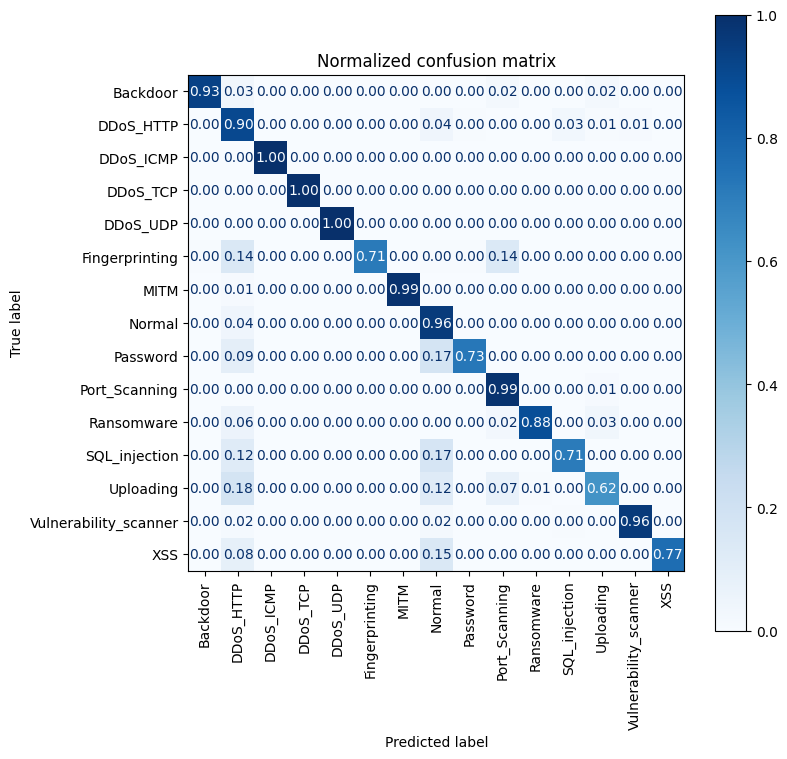

In [263]:


# 15 class

df  = prepare_dataset_v01(path_to_dataset)

X_train, X_test, y_train, y_test = dataset_split(df, target_label_15_class)

if False:
    tree_param = {'criterion':['gini','entropy', 'log_loss'],
                'max_depth':[4,5,6,7,8,16,32,48,64,80,96,124,148]}

    dt_cls = DecisionTreeClassifier(random_state=SEED)
    grid_search = GridSearchCV(dt_cls, tree_param, verbose=3)

    grid_search.fit(X_train, y_train)

    print('Tuned:')
    print('Parms: ', grid_search.best_params_)
    print('Score:', grid_search.best_score_)

    dt_cls = grid_search.best_estimator_
else:
    best_params = {'criterion': 'entropy', 'max_depth': 16}
    dt_cls = DecisionTreeClassifier(**best_params, random_state=SEED)

dt_cls.fit(X_train, y_train)
y_train_predict = dt_cls.predict(X_train)
y_test_predict = dt_cls.predict(X_test)

report_15(y_train, y_train_predict, y_test, y_test_predict)

title='Normalized confusion matrix'

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_test_predict,
    # display_labels=Attack_type_classes,
    cmap=plt.cm.Blues,
    normalize='true',
    values_format='.2f'
)
disp.ax_.set_title(title)
disp.figure_.set_size_inches(8, 8, forward=True)

plt.xticks(rotation=90)
plt.show()

In [264]:
df = prepare_dataset_v01(path_to_dataset)
df.drop(df[df['Attack_label'] == 0].index, inplace=True)
df.reset_index(drop=True, inplace=True)

/content/drive/MyDrive/github/ids/ids_common.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[name])
/content/drive/MyDrive/github/ids/ids_common.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[name])
/content/drive/MyDrive/github/ids/ids_common.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[name])
/content/drive/MyDrive/github/ids/ids_common.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[name])
/content/drive/MyDrive/github/ids/ids_common.py:

DDoS_UDP                 14498
DDoS_ICMP                13096
DDoS_HTTP                10495
SQL_injection            10282
DDoS_TCP                 10247
Uploading                10214
Vulnerability_scanner    10062
Password                  9972
Backdoor                  9865
Ransomware                9689
XSS                       9543
Port_Scanning             8921
Fingerprinting             853
MITM                       358
Normal                       0
Name: Attack_type, dtype: int64

TRAIN:
                       precision    recall  f1-score   support

             Backdoor       1.00      0.93      0.96      6906
            DDoS_HTTP       0.63      0.93      0.75      7346
            DDoS_ICMP       1.00      1.00      1.00      9167
             DDoS_TCP       1.00      1.00      1.00      7173
             DDoS_UDP       1.00      1.00      1.00     10149
       Fingerprinting       1.00      0.69      0.82       597
                 MITM       1.00      1.00      1.00       246
             Password       0.98      0.74      0.85      6980
        Port_Scanning       0.88      1.00      0.93      6245
           Ransomware       1.00      0.89      0.94      6782
        SQL_injection       0.64      0.89      0.74      7197
            Uploading       0.92      0.63      0.75      7150
Vulnerability_scanner       1.00      0.97      0.98      7043
                  XSS       1.00      0.76      0.86      6680

             accuracy                         

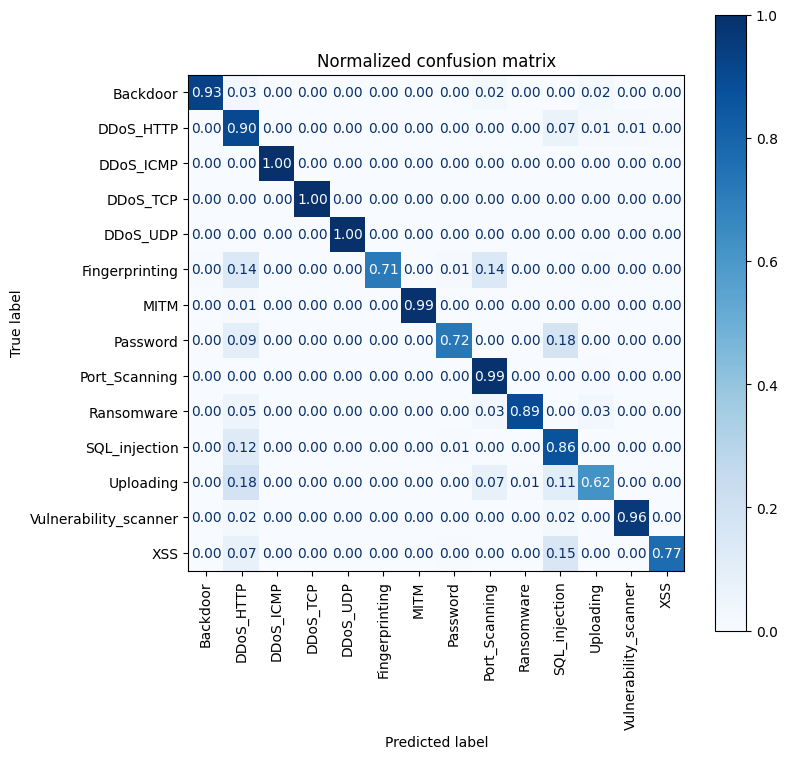

In [265]:

X_train, X_test, y_train, y_test = dataset_split(df, target_label_15_class)

if False:
    tree_param = {'criterion':['gini','entropy', 'log_loss'],
                'max_depth':[8,16,32,64,128,148]}

    dt_cls = DecisionTreeClassifier(random_state=SEED)
    grid_search = GridSearchCV(dt_cls, tree_param, verbose=3)

    grid_search.fit(X_train, y_train)

    print('Tuned:')
    print('Parms: ', grid_search.best_params_)
    print('Score:', grid_search.best_score_)

    dt_cls = grid_search.best_estimator_
else:
    best_params = {'criterion': 'entropy', 'max_depth': 16}
    dt_cls = DecisionTreeClassifier(**best_params, random_state=SEED)

dt_cls.fit(X_train, y_train)
y_train_predict = dt_cls.predict(X_train)
y_test_predict = dt_cls.predict(X_test)

report_15(y_train, y_train_predict, y_test, y_test_predict)

title='Normalized confusion matrix'

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_test_predict,
    # display_labels=Attack_type_classes,
    cmap=plt.cm.Blues,
    normalize='true',
    values_format='.2f'
)
disp.ax_.set_title(title)
disp.figure_.set_size_inches(8, 8, forward=True)

plt.xticks(rotation=90)
plt.show()

In [ ]:
# df  = ids_common.prepare_dataset('./dataset/DNN-EdgeIIoT-dataset.csv')



drop: NA: 0, DUPS: 309530
drop: NA: 0, DUPS: 309530
dropna: NA: 0, DUPS: 309530
drop_duplicates: NA: 0, DUPS: 0
################################################################################
TARGET: "Attack_label"
0    1363998
1     545673
Name: Attack_label, dtype: int64
--------------------------------------------------------------------------------
TARGET: "Attack_type"
Normal                   1363998
DDoS_UDP                  121567
DDoS_ICMP                  67939
SQL_injection              50826
DDoS_TCP                   50062
Vulnerability_scanner      50026
Password                   49933
DDoS_HTTP                  48544
Uploading                  36807
Backdoor                   24026
Port_Scanning              19977
XSS                        15066
Ransomware                  9689
Fingerprinting               853
MITM                         358
Name: Attack_type, dtype: int64
################################################################################


TRAIN:
                       precision    recall  f1-score   support

             Backdoor       1.00      0.93      0.97     16818
            DDoS_HTTP       0.92      0.69      0.79     33981
            DDoS_ICMP       1.00      1.00      1.00     47557
             DDoS_TCP       1.00      1.00      1.00     35044
             DDoS_UDP       1.00      1.00      1.00     85097
       Fingerprinting       0.99      0.68      0.81       597
                 MITM       1.00      1.00      1.00       251
               Normal       0.96      1.00      0.98    954798
             Password       1.00      0.73      0.85     34953
        Port_Scanning       0.85      1.00      0.92     13984
           Ransomware       1.00      0.88      0.94      6782
        SQL_injection       0.97      0.70      0.81     35578
            Uploading       0.97      0.63      0.76     25765
Vulnerability_scanner       1.00      0.96      0.98     35018
                  XSS       1.00      0.76     

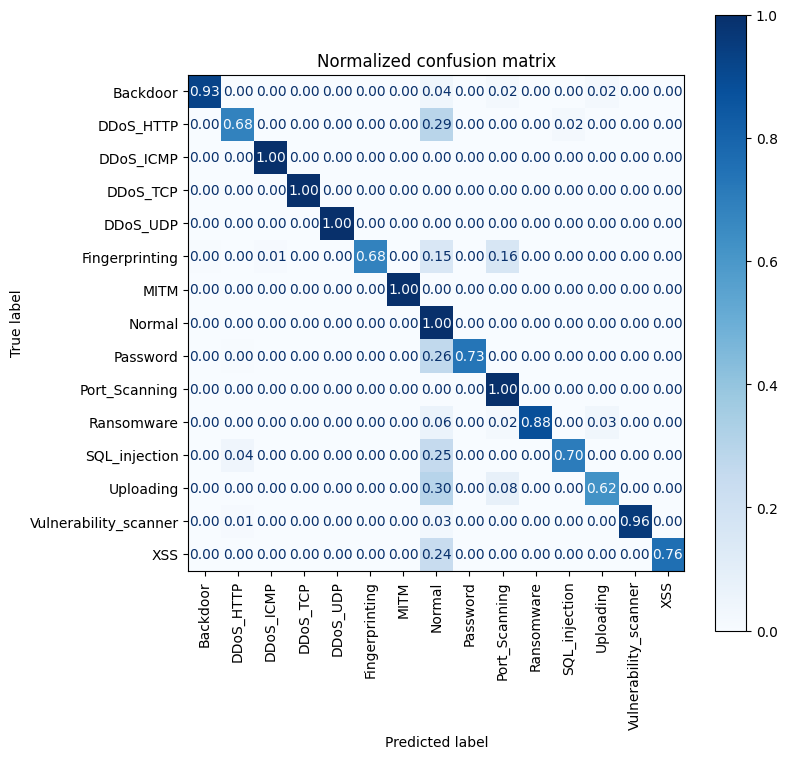

In [ ]:
# X_train, X_test, y_train, y_test = dataset_split(df, target_label_15_class)

# if False:
#     tree_param = {'criterion':['gini','entropy', 'log_loss'],
#                 'max_depth':[4,5,6,7,8,16,32,48,64,80,96,124,148]}

#     dt_cls = DecisionTreeClassifier(random_state=SEED)
#     grid_search = GridSearchCV(dt_cls, tree_param, verbose=3)

#     grid_search.fit(X_train, y_train)

#     print('Tuned:')
#     print('Parms: ', grid_search.best_params_)
#     print('Score:', grid_search.best_score_)

#     dt_cls = grid_search.best_estimator_
# else:
#     best_params = {'criterion': 'entropy', 'max_depth': 16}
#     dt_cls = DecisionTreeClassifier(**best_params, random_state=SEED)

# dt_cls.fit(X_train, y_train)
# y_train_predict = dt_cls.predict(X_train)
# y_test_predict = dt_cls.predict(X_test)

# report(y_train, y_train_predict, y_test, y_test_predict)

# title='Normalized confusion matrix'

# disp = ConfusionMatrixDisplay.from_predictions(
#     y_test,
#     y_test_predict,
#     # display_labels=Attack_type_classes,
#     cmap=plt.cm.Blues,
#     normalize='true',
#     values_format='.2f'
# )
# disp.ax_.set_title(title)
# disp.figure_.set_size_inches(8, 8, forward=True)

# plt.xticks(rotation=90)
# plt.show()